# Bayesian Flow Networks: Visualising Flows

# Imports

In [1]:
import jax.numpy as jnp
import jax.random as jr
import jax

from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
import bfn.continuous.visualising_flows as viz_flows
import bfn.utils as utils

In [3]:
time_slices = 1200
sigma_1 = 0.02
x = jnp.array([0.8])

## Main

### Calculating $p_F(\boldsymbol{\theta} | \mathbf{x}; t)$ and Generating Stochastic $\boldsymbol{\theta}_i \leftarrow h(\boldsymbol{\theta}_{i-1}, \mathbf{y}, \alpha)$

In [4]:
# Flow currently defined inefficiently since we could use analytic probability density function
utils.display_source(viz_flows.flow)

In [5]:
h, edges = viz_flows.flow(x, sigma_1, 100000, key=jr.PRNGKey(0), mu_range=(-2.0, 2.0), time_slices=time_slices)

In [6]:
utils.display_source(viz_flows.sample_mu)

In [7]:
num_timelines = 5
timeline_keys = jr.split(jr.PRNGKey(0), num_timelines)
steps = 800
mu_timelines = jax.vmap(viz_flows.sample_mu, in_axes=(None, None, None))(x, sigma_1, steps, key=timeline_keys)

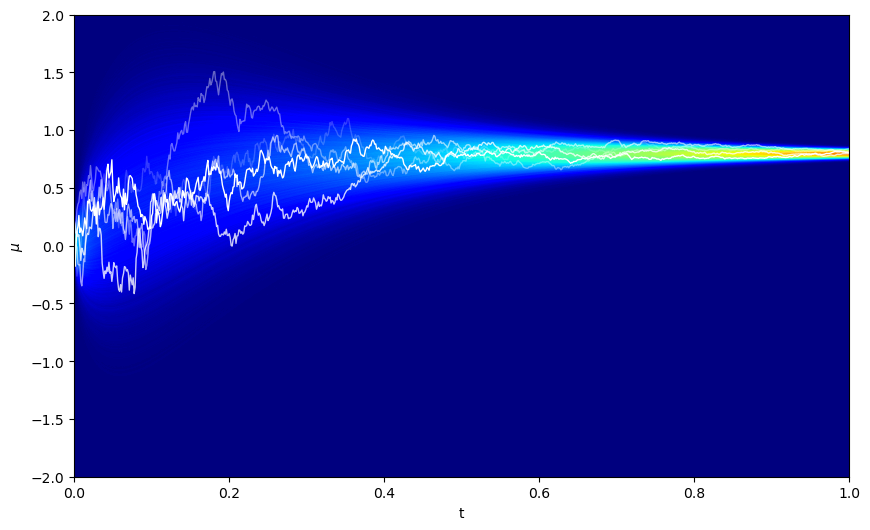

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

h_rescaled = jnp.log1p(h.T)[::-1, :] / jnp.log1p(h).max()
bottom, top = edges[0, 0], edges[0, -1]
_ = ax.imshow(h_rescaled, cmap="jet", vmin=0.0, vmax=0.7, aspect="auto", extent=[0, 1, bottom, top]) # Fudge vmax for aesthetics

for i in range(mu_timelines.shape[0]):
    ax.plot(jnp.linspace(0, 1, num=steps), mu_timelines[i], color="w", linewidth=1.0, linestyle="-", alpha=((i + 1) / mu_timelines.shape[0]))

_ = ax.set_xlabel("t")
_ = ax.set_ylabel(r"$\mu$")